# analysis example

## Setup

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Get csv data

In [2]:
df=pd.read_csv(
    'observation.csv',  
    parse_dates=['resultTime']  # converts the values in Column 'resultTime' to pandas Timestamp values
)
df

,id,type,resultTime,usedProcedure,madeBySensor,observedProperty,hasFeatureOfInterest,hasSimpleResult,hasResult_value,hasResult_unit
0,Observation0,sosa:Observation,2013-10-02 06:00:00,Procedure1,Sensor1_Hobo_U12,AirTemperature,ABCE_atrium,NaN,19.865,DEG_C
1,Observation1,sosa:Observation,2013-10-02 06:00:00,Procedure2,Sensor1_Hobo_U12,AirRelativeHumidity,ABCE_atrium,NaN,59.728,PERCENT
2,Observation2,sosa:Observation,2013-10-02 06:00:00,Procedure3,Sensor1_Hobo_U12,LightIntensity,ABCE_atrium,NaN,11.800,LUX
3,Observation3,sosa:Observation,2013-10-02 06:30:00,Procedure1,Sensor1_Hobo_U12,AirTemperature,ABCE_atrium,NaN,19.817,DEG_C
4,Observation4,sosa:Observation,2013-10-02 06:30:00,Procedure2,Sensor1_Hobo_U12,AirRelativeHumidity,ABCE_atrium,NaN,59.781,PERCENT
...,...,...,...,...,...,...,...,...,...,...
8994,Observation8994,sosa:Observation,2013-12-03 16:30:00,Procedure3,Sensor1_Hobo_U12,LightIntensity,ABCE_atrium,NaN,11.800,LUX
8995,Observation8995,sosa:Observation,2013-12-03 16:35:56,Procedure5,Sensor1_Hobo_U12,HostConnected,Sensor1_Hobo_U12,Logged,NaN,NaN
8996,Observation8996,sosa:Observation,2013-12-03 16:36:04,Procedure5,Sensor1_Hobo_U12,HostConnected,Sensor1_Hobo_U12,Logged,NaN,NaN
8997,Observation8997,sosa:Observation,2013-12-03 16:36:22,Procedure6,Sensor1_Hobo_U12,Stopped,Sensor1_Hobo_U12,Logged,NaN,NaN


## Create a plot of measured air temperatures

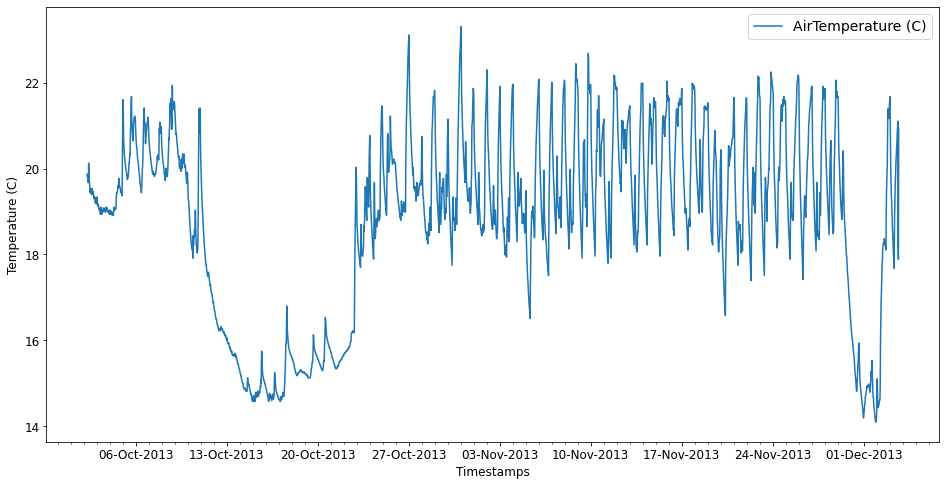

In [3]:
fig,ax=plt.subplots(figsize=(16,8))
mask=(df.observedProperty=='AirTemperature')
ax.plot(df.resultTime[mask],
        df.hasResult_value[mask],
        label='AirTemperature (C)'
       )
ax.legend(fontsize=14)
ax.set_xlabel('Timestamps')
ax.set_ylabel('Temperature (C)')
for item in [ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels(): item.set_fontsize(12)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
plt.show()

## Create a plot of all variables measured with units 'PERCENT'

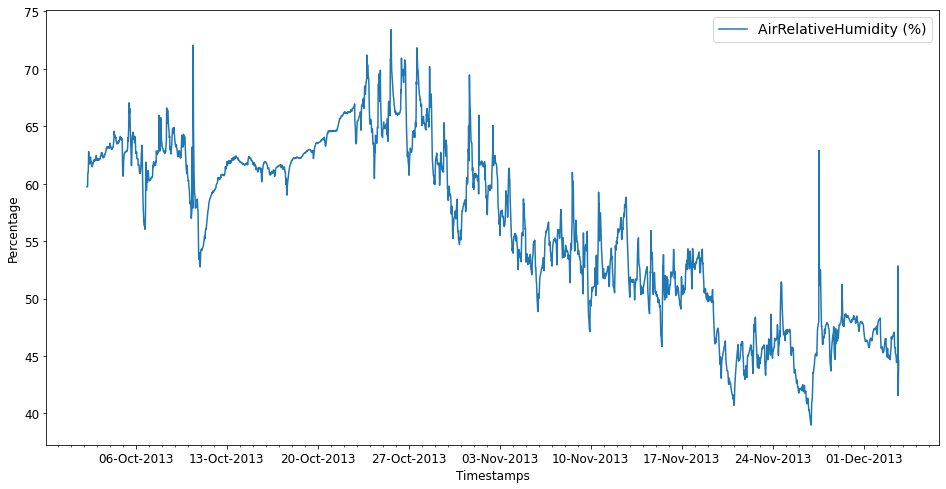

In [4]:
fig,ax=plt.subplots(figsize=(16,8))
df1=df[df.hasResult_unit=='PERCENT']
for observedProperty in df1.observedProperty.unique():
    mask=(df.observedProperty==observedProperty)
    ax.plot(df.resultTime[mask],
            df.hasResult_value[mask],
            label=f'{observedProperty} (%)'
           )
ax.legend(fontsize=14)
ax.set_xlabel('Timestamps')
ax.set_ylabel('Percentage')
for item in [ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels(): item.set_fontsize(12)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
plt.show()